In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
# Load data from CSV files
telegram_messages = pd.read_csv("../data/banks_telegram_posts_data.csv")
play_store_reviews = pd.read_csv("../data/abyssinia_bank_reviews.csv")

In [18]:
# Data Summarization
# Telegram messages dataset
print("Telegram Messages Dataset Summary:")
print(telegram_messages.describe())

# Google Play Store reviews dataset
print("\nGoogle Play Store Reviews Dataset Summary:")
print(play_store_reviews.describe())

Telegram Messages Dataset Summary:
               views
count     136.000000
mean   272208.823529
std     35069.289024
min    193500.000000
25%    249700.000000
50%    267400.000000
75%    298325.000000
max    347100.000000

Google Play Store Reviews Dataset Summary:
                👍  replyContent  repliedAt       score
count  199.000000           0.0        0.0  199.000000
mean     2.899497           NaN        NaN    2.502513
std     21.047804           NaN        NaN    1.749096
min      0.000000           NaN        NaN    1.000000
25%      0.000000           NaN        NaN    1.000000
50%      0.000000           NaN        NaN    1.000000
75%      1.000000           NaN        NaN    5.000000
max    271.000000           NaN        NaN    5.000000


In [19]:
# Data Quality Assessment
print("\nMissing Values in Telegram Messages Dataset:")
print(telegram_messages.isnull().sum())

print("\nMissing Values in Google Play Store Reviews Dataset:")
print(play_store_reviews.isnull().sum())


Missing Values in Telegram Messages Dataset:
post_link      0
date           1
views          0
post_time      1
bank           0
time_of_day    1
dtype: int64

Missing Values in Google Play Store Reviews Dataset:
reviewId                  0
userName                  0
userImage                 0
👍                         0
reviewCreatedVersion     50
at                        0
replyContent            199
repliedAt               199
appVersion               50
score                     0
Comments                  0
Sentiment                 0
Keywords                  3
LDA_Category              0
Insight                   0
dtype: int64


In [20]:
# Print column names of the Google Play Store reviews dataset
print("Column names of Google Play Store Reviews Dataset:")
print(play_store_reviews.columns)


Column names of Google Play Store Reviews Dataset:
Index(['reviewId', 'userName', 'userImage', '👍', 'reviewCreatedVersion', 'at',
       'replyContent', 'repliedAt', 'appVersion', 'score', 'Comments',
       'Sentiment', 'Keywords', 'LDA_Category', 'Insight'],
      dtype='object')


In [21]:
# Check the data type of the 'Sentiment' column
print(play_store_reviews['Sentiment'].dtype)


object


In [22]:
print(play_store_reviews['Sentiment'].unique())


['Neutral' 'Negative' 'Positive']


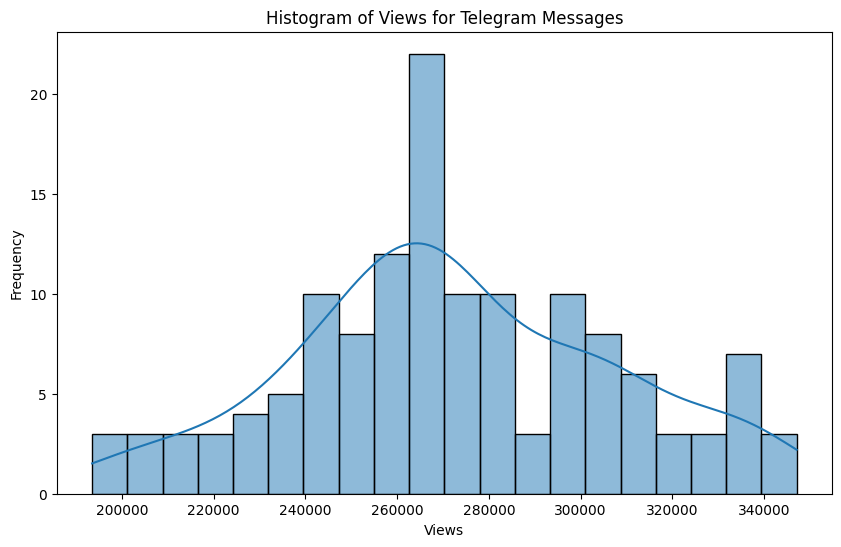

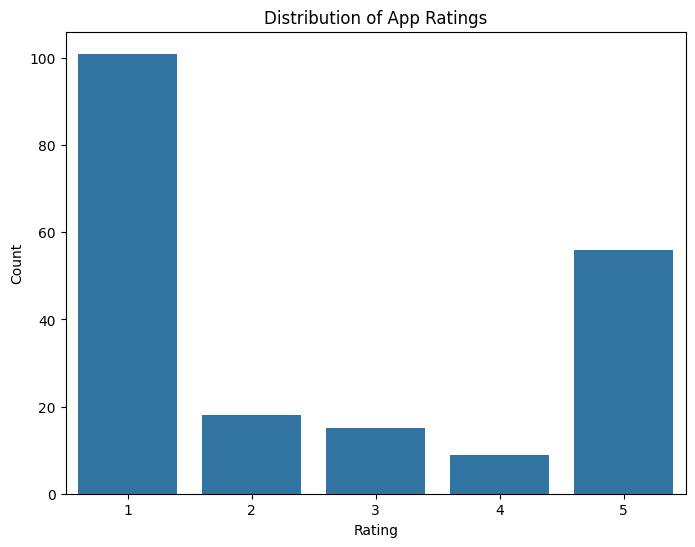

In [24]:
# Univariate Analysis
# Histogram of views for Telegram messages
plt.figure(figsize=(10, 6))
sns.histplot(telegram_messages['views'], bins=20, kde=True)
plt.title('Histogram of Views for Telegram Messages')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

# Bar plot of app ratings for Google Play Store reviews
plt.figure(figsize=(8, 6))
sns.countplot(x='score', data=play_store_reviews)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


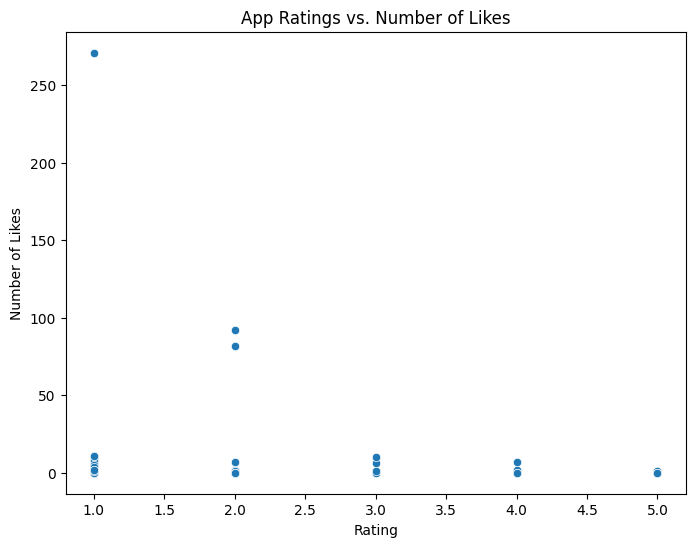

In [25]:
# Bivariate Analysis
# Scatter plot of app ratings vs. number of likes
plt.figure(figsize=(8, 6))
sns.scatterplot(x='score', y='👍', data=play_store_reviews)
plt.title('App Ratings vs. Number of Likes')
plt.xlabel('Rating')
plt.ylabel('Number of Likes')
plt.show()




/home/ted/Desktop/DEV/marketing-analytics-dashboard/venv/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/ted/Desktop/DEV/marketing-analytics-dashboard/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


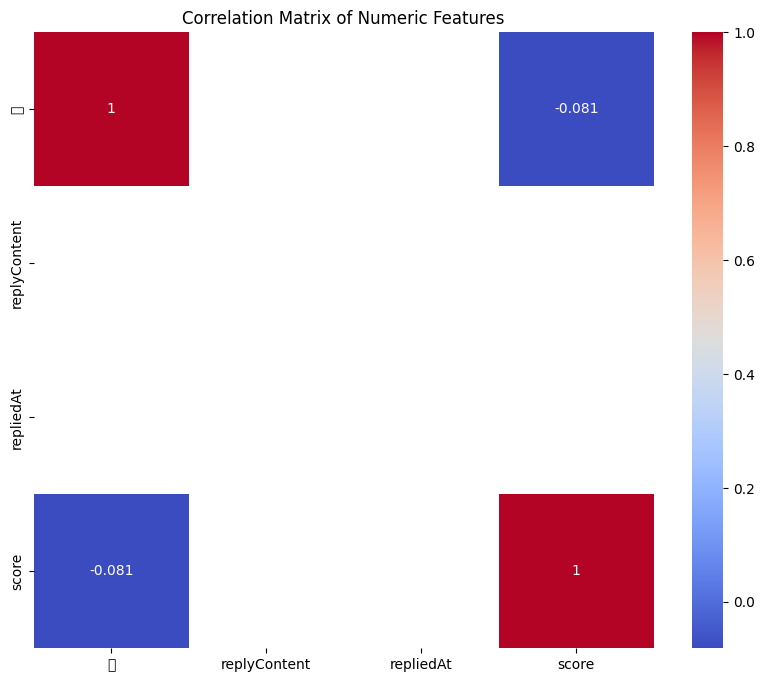

In [26]:
# Selecting only numeric columns
numeric_columns = play_store_reviews.select_dtypes(include=[np.number])

# Correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [27]:
from textblob import TextBlob

# Define a function to perform sentiment analysis
def perform_sentiment_analysis(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Add a new column 'Sentiment' to the Google Play Store reviews dataset based on sentiment analysis
play_store_reviews['Sentiment'] = play_store_reviews['Comments'].apply(perform_sentiment_analysis)


In [28]:
# Add a new column 'Sentiment' to the Google Play Store reviews dataset based on sentiment analysis
# Data Enrichment:
play_store_reviews['Sentiment'] = play_store_reviews['Comments'].apply(perform_sentiment_analysis)


In [29]:
print(play_store_reviews['Sentiment'])

0       neutral
1       neutral
2      negative
3      positive
4      positive
         ...   
194    negative
195     neutral
196    positive
197    negative
198    positive
Name: Sentiment, Length: 199, dtype: object


In [30]:
print(telegram_messages.columns)


Index(['post_link', 'date', 'views', 'post_time', 'bank', 'time_of_day'], dtype='object')


In [31]:
print(telegram_messages.head())
print(telegram_messages.columns)

                           post_link                       date   views  \
0  https://t.me/tikvahethiopia/70382  2022-05-19T13:47:14+00:00  310300   
1  https://t.me/tikvahethiopia/70383  2022-05-19T13:47:14+00:00  310300   
2  https://t.me/tikvahethiopia/73378  2022-08-30T11:13:05+00:00  267400   
3  https://t.me/tikvahethiopia/73379  2022-08-30T11:13:05+00:00  267400   
4  https://t.me/tikvahethiopia/74556  2022-11-03T16:07:35+00:00  347100   

  post_time  bank time_of_day  
0  13:47:14  #CBE   afternoon  
1  13:47:14  #CBE   afternoon  
2  11:13:05  #CBE     morning  
3  11:13:05  #CBE     morning  
4  16:07:35  #CBE   afternoon  
Index(['post_link', 'date', 'views', 'post_time', 'bank', 'time_of_day'], dtype='object')


/tmp/ipykernel_16625/2032431466.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='bank', y='views', data=telegram_messages, estimator=sum, ci=None)


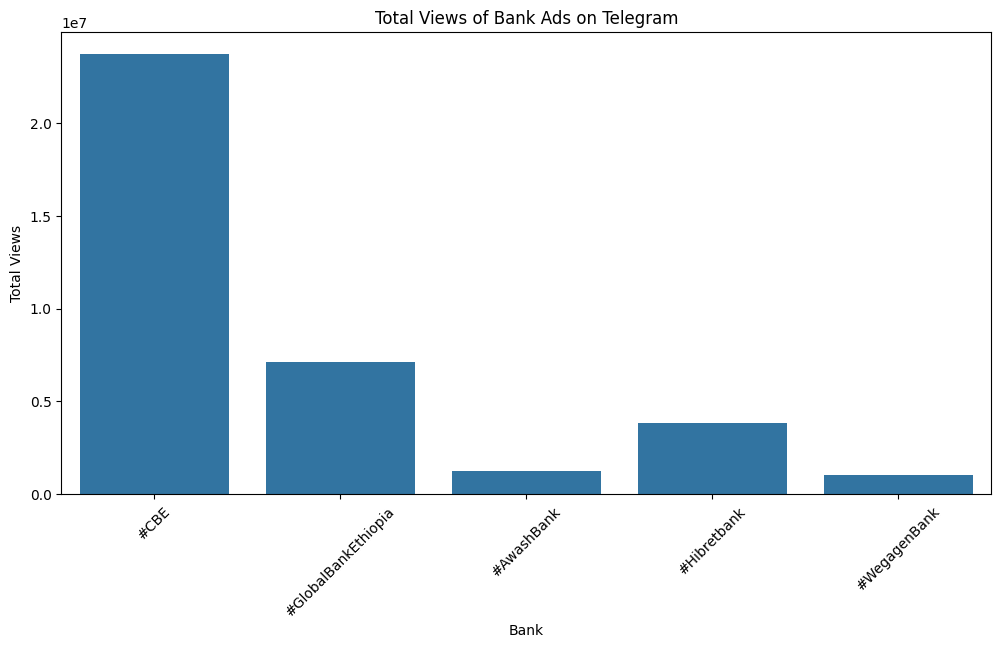

In [34]:
# Data Comparison:
# Data Comparison: Bar plot of total views for different banks
plt.figure(figsize=(12, 6))
sns.barplot(x='bank', y='views', data=telegram_messages, estimator=sum, ci=None)
plt.title('Total Views of Bank Ads on Telegram')
plt.xlabel('Bank')
plt.ylabel('Total Views')
plt.xticks(rotation=45)
plt.show()

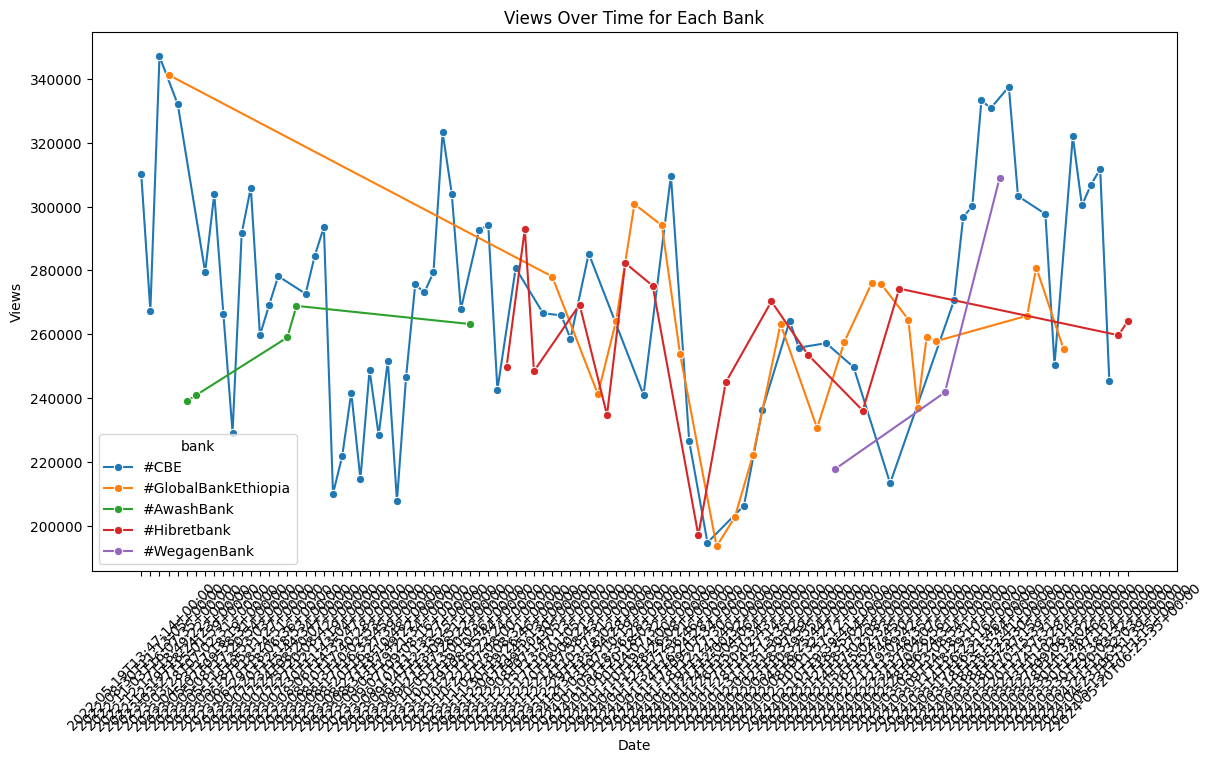

In [52]:
# Trend Over Time: Views over time for each bank
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='views', hue='bank', data=telegram_messages, marker='o')
plt.title('Views Over Time for Each Bank')
plt.xlabel('Date')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.show()


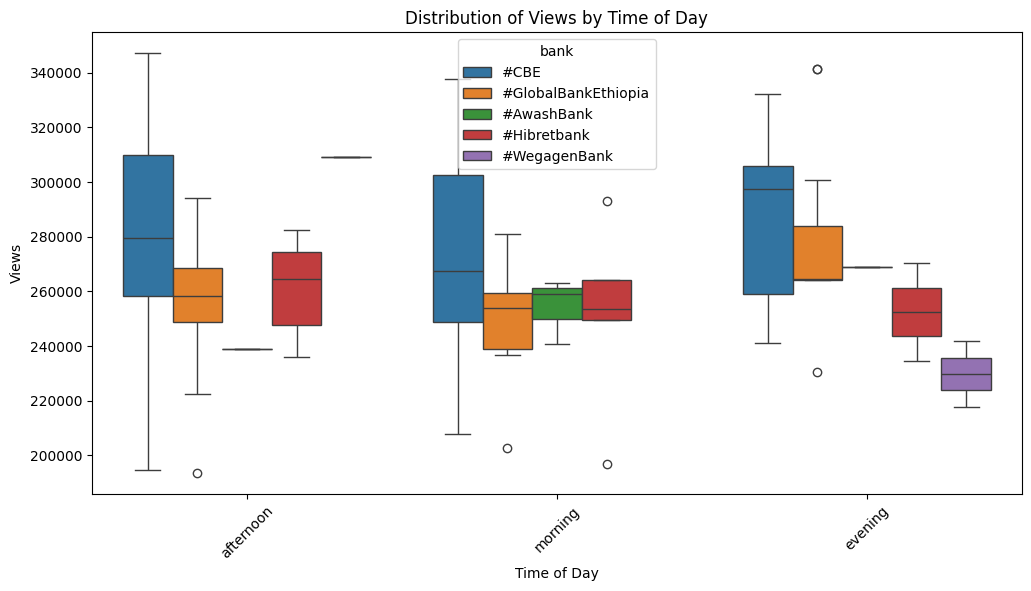

In [36]:
# Views by Time of Day: Distribution of views based on the time of day
plt.figure(figsize=(12, 6))
sns.boxplot(x='time_of_day', y='views', hue='bank', data=telegram_messages)
plt.title('Distribution of Views by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.show()


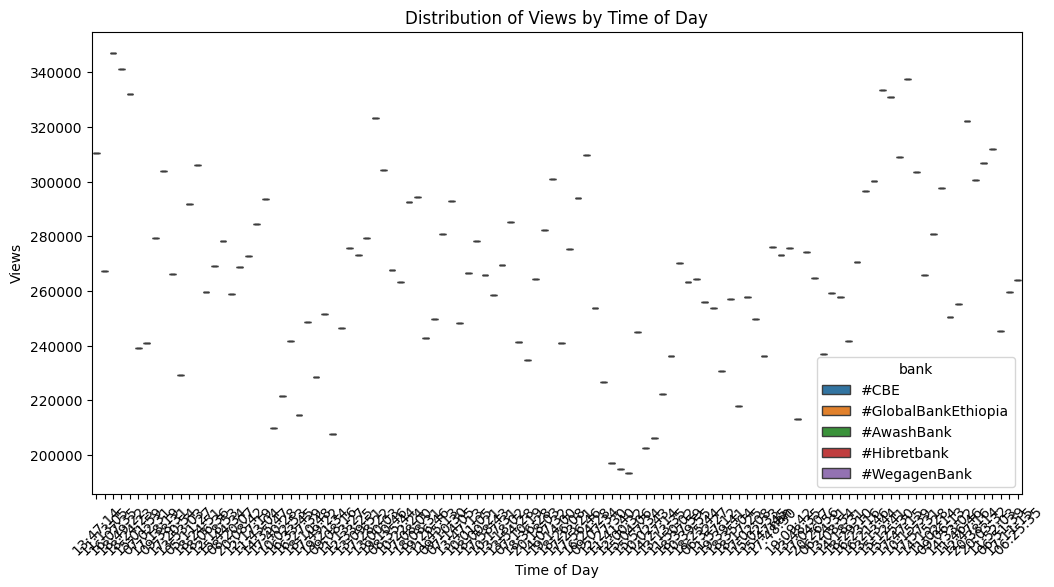

In [39]:
# Ensure 'Time of day' is treated as a categorical variable if necessary
telegram_messages['post_time'] = telegram_messages['post_time'].astype(str)

# Views by Time of Day: Distribution of views based on the time of day
plt.figure(figsize=(12, 6))
sns.boxplot(x='post_time', y='views', hue='bank', data=telegram_messages)
plt.title('Distribution of Views by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.show()


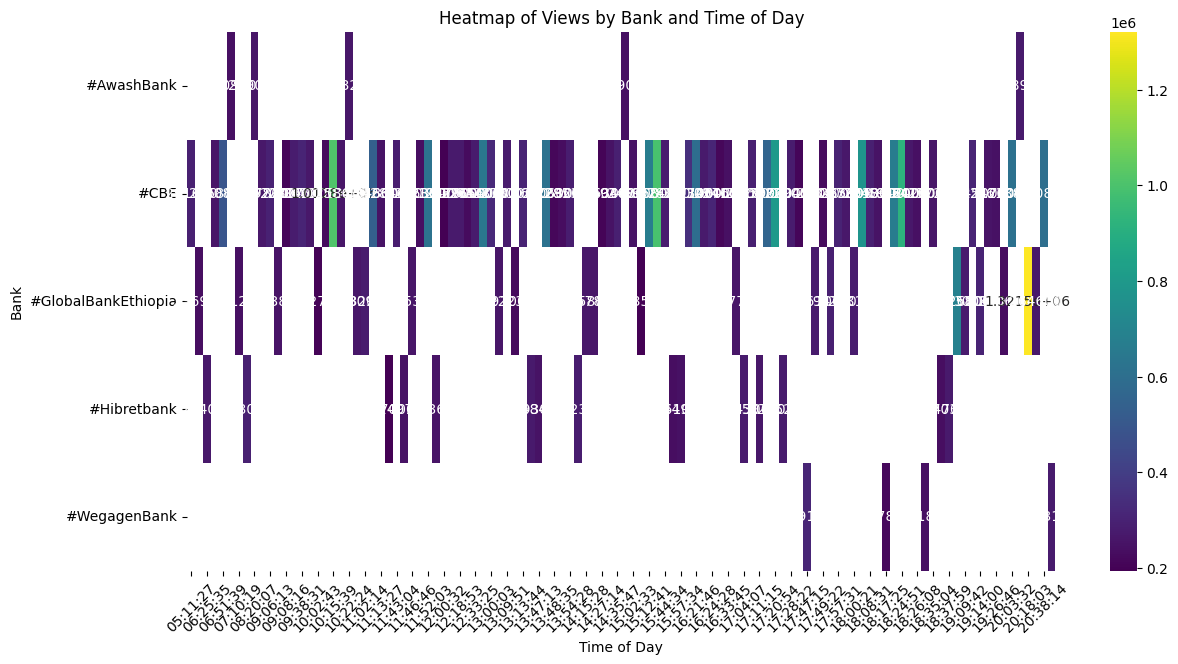

In [40]:
#Heatmap of Views by Bank and Time of Day
views_pivot = telegram_messages.pivot_table(values='views', index='bank', columns='post_time', aggfunc='sum')

plt.figure(figsize=(14, 7))
sns.heatmap(views_pivot, annot=True, fmt='g', cmap='viridis')
plt.title('Heatmap of Views by Bank and Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Bank')
plt.xticks(rotation=45)
plt.show()


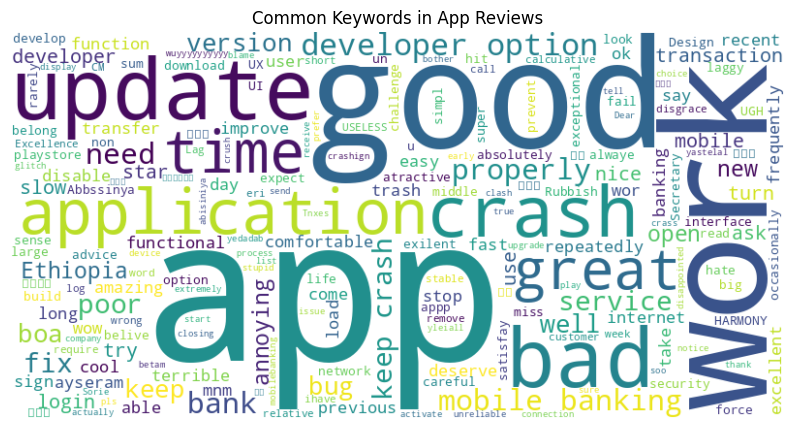

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ensure that all values in 'Keywords' are strings and handle NaN values
play_store_reviews['Keywords'] = play_store_reviews['Keywords'].fillna('').astype(str)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(play_store_reviews['Keywords']))

# Plot word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Keywords in App Reviews')
plt.show()


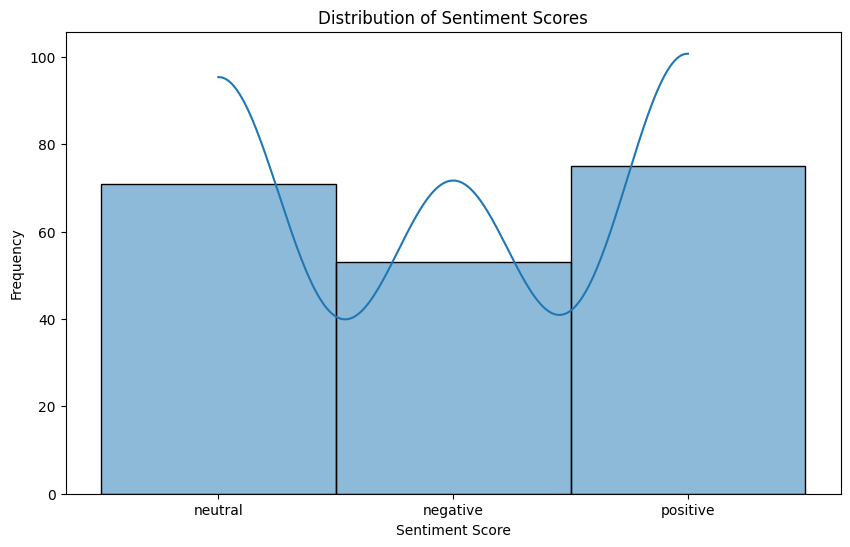

In [42]:
# Assuming 'Sentiment' column exists and contains sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(play_store_reviews['Sentiment'], bins=20, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


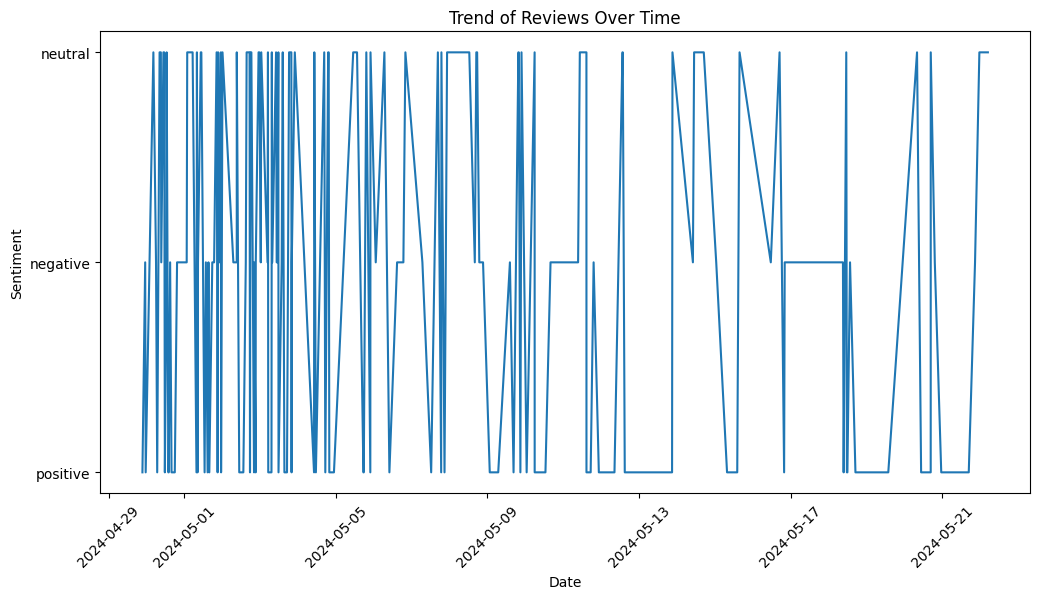

In [43]:
#Trend of Reviews Over Time
play_store_reviews['at'] = pd.to_datetime(play_store_reviews['at'])
plt.figure(figsize=(12, 6))
sns.lineplot(x='at', y='Sentiment', data=play_store_reviews)
plt.title('Trend of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.xticks(rotation=45)
plt.show()


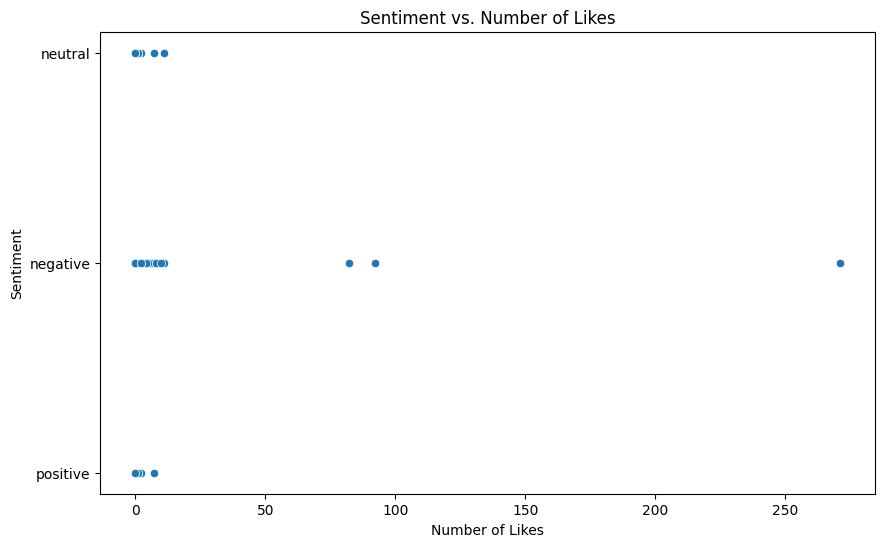

In [44]:
#Scatter Plot of Sentiment vs. Number of Likes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='👍', y='Sentiment', data=play_store_reviews)
plt.title('Sentiment vs. Number of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Sentiment')
plt.show()


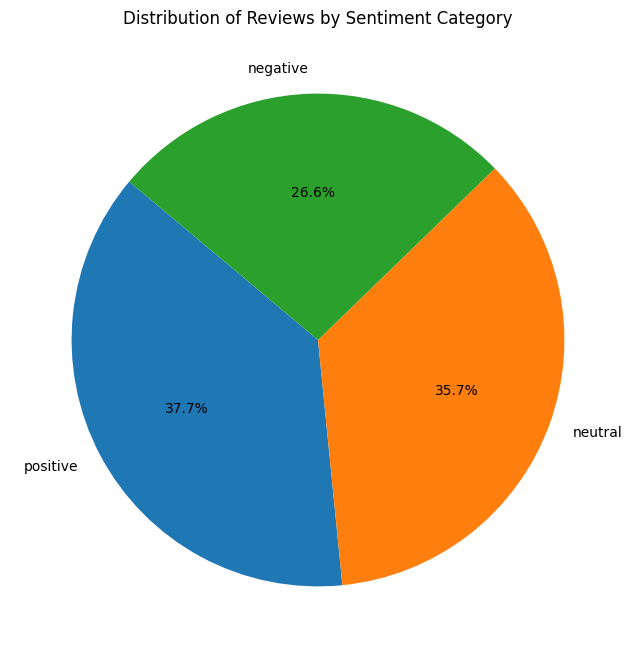

In [45]:
#Pie Chart of Reviews by Sentiment Category
sentiment_counts = play_store_reviews['Sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Reviews by Sentiment Category')
plt.show()


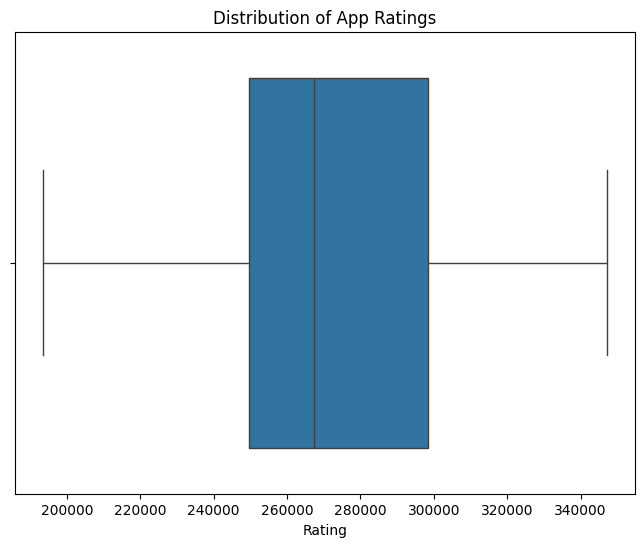

In [47]:
# Box plot of app ratings to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='views', data=telegram_messages)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.show()
